In [1]:
# загружаем необходимые библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# пишем функцию, которая нам сгенерирует 1000 наблюдений
# - количество секунд, прошедших после полуночи
def rand_times(n):
    np.random.seed(42)
    rand_seconds = np.random.randint(0, 24 * 60 * 60, n)
    return pd.DataFrame(data=dict(seconds=rand_seconds))
n_rows = 1000
df = rand_times(n_rows)
# сортируем значения для построения графика
df = df.sort_values('seconds').reset_index(drop=True)
df.head()

seconds
0       55
1       77
2      117
3      206
4      235

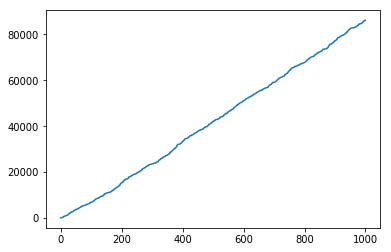

In [3]:
# строим график
df.seconds.plot()

In [4]:
# выполняем синусное и косинусное преобразование
# признака seconds и удаляем признак seconds
seconds_in_day = 24 * 60 * 60
df['sin_time'] = np.sin(2 * np.pi * df.seconds / seconds_in_day)
df['cos_time'] = np.cos(2 * np.pi * df.seconds / seconds_in_day)
df.drop('seconds', axis=1, inplace=True)
df.head()

sin_time  cos_time
0  0.004000  0.999992
1  0.005600  0.999984
2  0.008508  0.999964
3  0.014980  0.999888
4  0.017089  0.999854

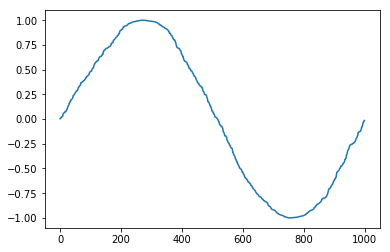

In [5]:
# выводим график для переменной, полученной
# в результате синусного преобразования
df.sin_time.plot()

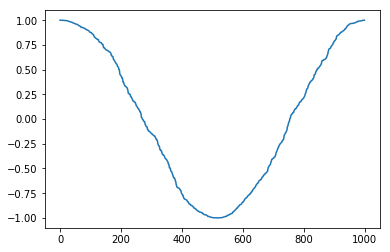

In [6]:
# выводим график для переменной, полученной
# в результате косинусного преобразования
df.cos_time.plot()

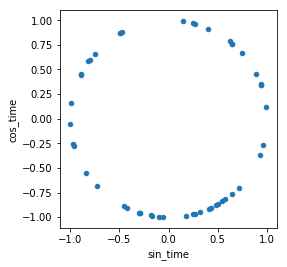

In [7]:
# выводим результаты нашего преобразования 
# в виде 24-часового цикла
df.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal')